In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthetic-cancer-prediction-dataset-for-research/cancer_prediction_dataset.csv


In [2]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex5 import *

In [3]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [4]:
df = pd.read_csv('/kaggle/input/synthetic-cancer-prediction-dataset-for-research/cancer_prediction_dataset.csv')

In [5]:
#Data visualization
df.head()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Gender   10000 non-null  int64
 1   Age      10000 non-null  int64
 2   Smoking  10000 non-null  int64
 3   Fatigue  10000 non-null  int64
 4   Allergy  10000 non-null  int64
 5   Cancer   10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [7]:
df.columns

Index(['Gender', 'Age', 'Smoking', 'Fatigue', 'Allergy', 'Cancer'], dtype='object')

In [8]:
X = df.copy().dropna()
y=X.pop('Cancer')

X.shape



(10000, 5)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9598)


In [10]:
X_train.shape

(7500, 5)

In [11]:
# Assuming you want to scale numerical features using StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from keras.utils import to_categorical, plot_model

In [12]:
# Define preprocessing steps
preprocessor = make_column_transformer(
    (StandardScaler(), ['Age']),  # Add other numerical features if needed
    remainder='passthrough'
)

In [13]:
# Apply preprocessing to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [14]:
# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [15]:
# Build the model
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax'),  # Two classes: cancer or not cancer
])

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use binary crossentropy for binary classification
    metrics=['accuracy'],
)

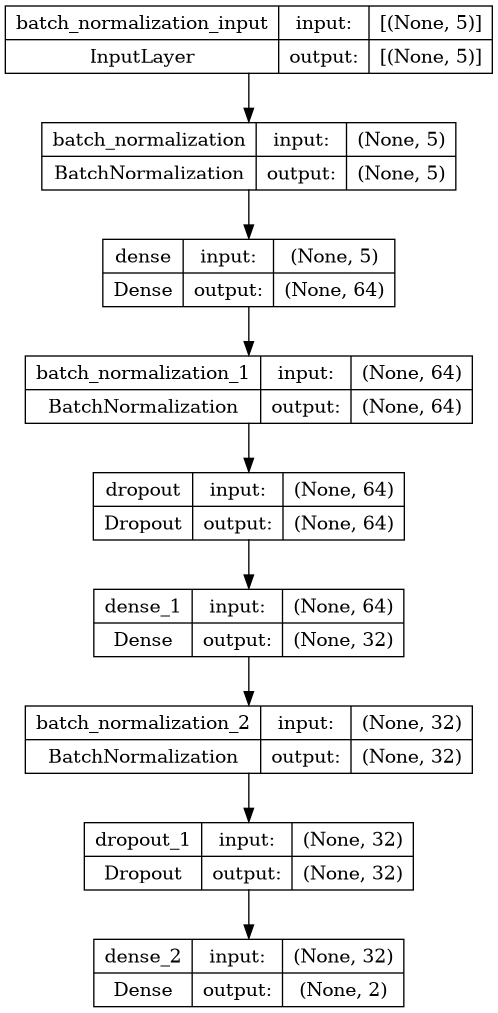

In [17]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/200
15/15 [==============================] - 2s 23ms/step - loss: 0.8636 - accuracy: 0.5163 - val_loss: 0.6547 - val_accuracy: 0.8564
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.7764 - accuracy: 0.5477 - val_loss: 0.6174 - val_accuracy: 0.9048
Epoch 3/200
15/15 [==============================] - 0s 7ms/step - loss: 0.7299 - accuracy: 0.5973 - val_loss: 0.5911 - val_accuracy: 0.9048
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6954 - accuracy: 0.6319 - val_loss: 0.5649 - val_accuracy: 0.9048
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6586 - accuracy: 0.6759 - val_loss: 0.5409 - val_accuracy: 0.9048
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6301 - accuracy: 0.7113 - val_loss: 0.5175 - val_accuracy: 0.9048
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.5982 - accuracy: 0.7543 - val_loss: 0.4944 - val_accuracy: 0.9048
Epoch 8/200


<Axes: title={'center': 'Accuracy'}>

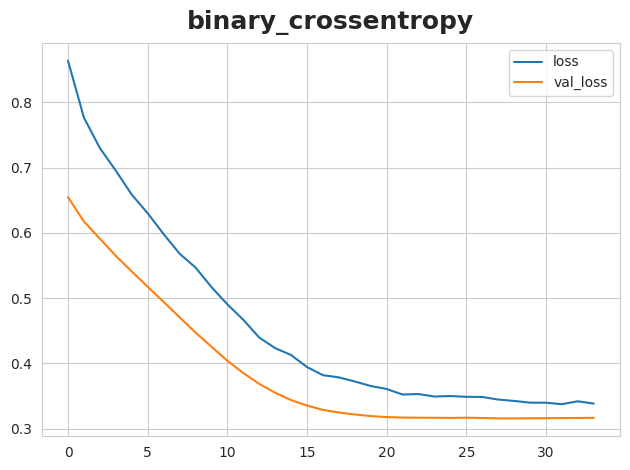

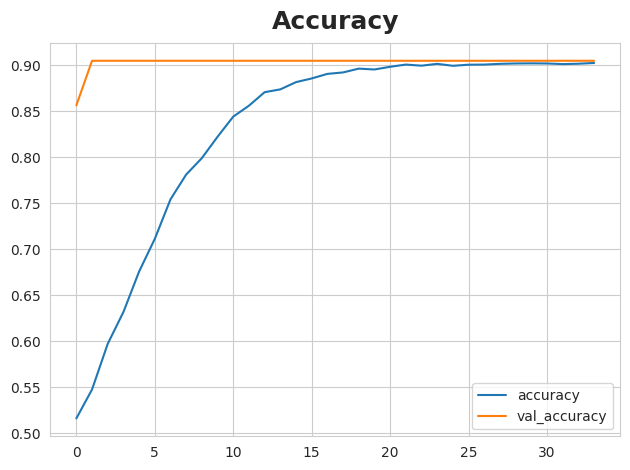

In [18]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="binary_crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")